# Chapter 6. AI 기초 - Preprocessing & Hyper Parameter
* 교재 : 으뜸 머신러닝(생능출판)
* 출처 : https://www.booksr.co.kr/product/9788970503691/

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Validation Dataset

## Ex) Breast cancer

### Data

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns= data.feature_names)
df['Target'] = data.target
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [5]:
df['Target'].value_counts()

1    357
0    212
Name: Target, dtype: int64

### Data Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
print(X.shape, Y.shape)

(569, 30) (569,)


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size= 0.2,
                                                    stratify= Y,
                                                    random_state= 1)

* columns가 31개이므로 10^31개의 데이터가 있어야 학습이 잘 된다고 볼 수 있다.

### Validation Dataset

In [9]:
# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
#                                                   test_size= 0.2,
#                                                   stratify= Y_train,
#                                                   random_state= 1)

### K-Fold Validation

In [10]:
from sklearn.model_selection import StratifiedKFold

In [11]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size= 0.2,
                                                    stratify= Y,
                                                    random_state= 1)
kfold = StratifiedKFold(n_splits= 10,
                        shuffle= True,
                        random_state= 1).split(X_train, Y_train)

In [12]:
kfold

<generator object _BaseKFold.split at 0x000001515959D850>

In [13]:
# for train, val in kfold :
#     X_train_scaled = scaler.fit_transform(X_train[train])
#     X_val_scaled = scaler.transform(X_train[val])
    
#     model.fit(X_train_scaled, Y_train[traain])
#     pred = model.predict(X_val_scaled)
    
#     score(Y_train[val], pred)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
kfold = StratifiedKFold(n_splits= 10,
                        shuffle= True,
                        random_state= 1).split(X_train, Y_train)

cv_score = []
for i, (train, val) in enumerate(kfold) :
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[train])
    X_val_scaled = scaler.transform(X_train[val])
    
    pca = PCA(n_components= 2)
    X_train_scaled = pca.fit_transform(X_train_scaled)
    X_val_scaled = pca.transform(X_val_scaled)
        
    model = LogisticRegression(solver= 'liblinear',
                               random_state= 1)
    model.fit(X_train_scaled, Y_train[train])
    pred = model.predict(X_val_scaled)
    
    # score 확인 방법 1
    score1 = accuracy_score(Y_train[val], pred)
    
    # score 확인 방법 2
    score2 = model.score(X_val_scaled, Y_train[val])
    
    # 결과 저장
    # cv_score.append(score1)
    cv_score.append(score2)
    print('Fold {} 정확도 : {:.4f}'.format(i+1, score2))
    
print('\nCross Validation 정확도 : {:.4f}'.format(np.mean(cv_score)))

Fold 1 정확도 : 1.0000
Fold 2 정확도 : 0.9348
Fold 3 정확도 : 0.9130
Fold 4 정확도 : 0.9348
Fold 5 정확도 : 0.9783
Fold 6 정확도 : 0.9333
Fold 7 정확도 : 0.9333
Fold 8 정확도 : 0.9778
Fold 9 정확도 : 0.9556
Fold 10 정확도 : 0.9333

Cross Validation 정확도 : 0.9494


# 2. cross_val_score(with pipeline)

In [16]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size= 0.2,
                                                    stratify= Y,
                                                    random_state= 1)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [18]:
lr_pipe = make_pipeline(
                        StandardScaler(),
                        PCA(n_components= 2),
                        LogisticRegression(solver= 'liblinear',
                                           random_state= 1)
                        )
# lr_pipe.fit(X_rain, Y_train)
# lr_pipe.predict(X_test)

cvscore = cross_val_score(estimator= lr_pipe, 
                          X= X_train,
                          y= Y_train,
                          # scoring= f1_score, # recall_score etc
                          cv= 10,
                          n_jobs= -1)

print('CV 정확도 : {:.4f}'.format(np.mean(cvscore)))

CV 정확도 : 0.9451


# 3. Overfitting

## Learning Curve

In [19]:
from sklearn.model_selection import learning_curve

In [20]:
lr_pipe = make_pipeline(
                        StandardScaler(),
                        # PCA(n_components= 2),
                        LogisticRegression(solver= 'liblinear',
                                           random_state= 1)
                        )

sizes, train_score, val_score = learning_curve(estimator= lr_pipe,
                                               X= X_train,
                                               y= Y_train,
                                               train_sizes= np.linspace(0.1,1,10),
                                               cv= 10,
                                               n_jobs = -1)

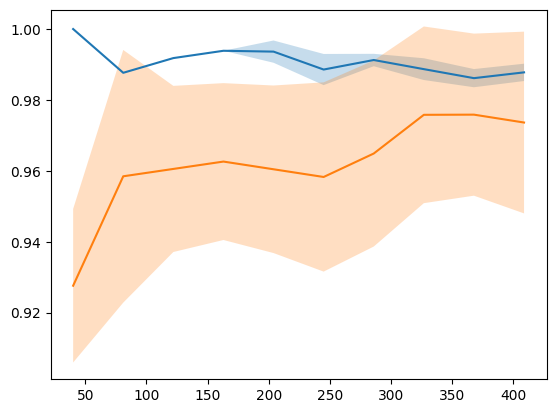

In [21]:
train_mean = np.mean(train_score, axis= 1)
val_mean = np.mean(val_score, axis= 1)

train_std = np.std(train_score, axis= 1)
val_std = np.std(val_score, axis= 1)

plt.figure()

plt.plot(sizes, train_mean)
plt.fill_between(sizes, train_mean+train_std, train_mean-train_std,
                 alpha= 0.25)

plt.plot(sizes, val_mean)
plt.fill_between(sizes, val_mean+val_std, val_mean-val_std,
                 alpha= 0.25)

plt.show()

## Validation Curve

In [22]:
from sklearn.model_selection import validation_curve

In [23]:
C_range = np.logspace(-3, 2, 6)

lr_pipe = make_pipeline(StandardScaler(),
                        # PCA(n_components= 2),
                        LogisticRegression(solver= 'liblinear',
                                           penalty= 'l2',
                                           random_state= 1))

train_score, val_score = validation_curve(estimator= lr_pipe,
                                          X= X_train,
                                          y= Y_train,
                                          param_name= 'logisticregression__C',
                                          param_range= C_range,
                                          cv= 10,
                                          n_jobs= -1)

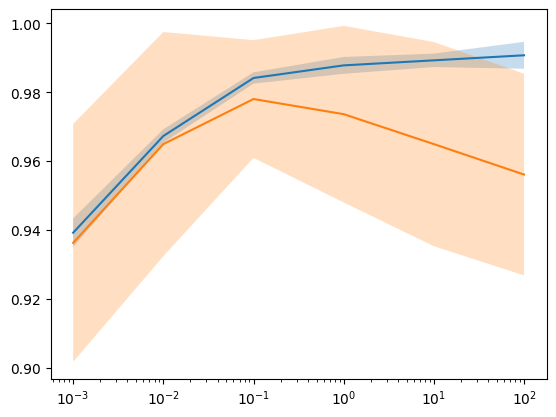

In [24]:
train_mean = np.mean(train_score, axis= 1)
val_mean = np.mean(val_score, axis= 1)

train_std = np.std(train_score, axis= 1)
val_std = np.std(val_score, axis= 1)

plt.figure()

plt.plot(C_range, train_mean)
plt.fill_between(C_range, train_mean+train_std, train_mean-train_std,
                 alpha= 0.25)

plt.plot(C_range, val_mean)
plt.fill_between(C_range, val_mean+val_std, val_mean-val_std,
                 alpha= 0.25)

plt.xscale('log')
plt.show()

# 4. GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [26]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size= 0.2,
                                                    stratify= Y,
                                                    random_state= 1)

In [27]:
svc_pipe = make_pipeline(StandardScaler(),
                         SVC(random_state= 1))

C_range = np.logspace(-4, 3, 8)
gamma_range = np.logspace(-4, 3, 8)
param_grid = [{'svc__C' : C_range,
               'svc__kernel' : ['linear']},
              {'svc__C' : C_range,
               'svc__gamma' : gamma_range,
               'svc__kernel' : ['rbf']}]

# 시작 시간 설정
import time
start_time = time.time()

svc_grid = GridSearchCV(estimator= svc_pipe,
                        param_grid= param_grid,
                        scoring= 'accuracy',
                        cv= 10,
                        n_jobs= -1)
svc_grid = svc_grid.fit(X_train, Y_train)

# 결과 확인
print('수행 시간 : {:.0f} 분 {:.0f} 초\n'.format((time.time() - start_time) // 60, (time.time() - start_time) % 60))
print('best estimator model: \n{}'.format(svc_grid.best_estimator_))
print('\nbest parameter: \n{}'.format(svc_grid.best_params_))
print('\nbest score: \n{:.4f}'.format(svc_grid.best_score_))

수행 시간 : 0 분 3 초

best estimator model: 
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10.0, gamma=0.001, random_state=1))])

best parameter: 
{'svc__C': 10.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

best score: 
0.9758


In [28]:
# lr_grid = GridSearchCV(estimator= LogisticRegression(), cv= 2)
# svc_grid = GridSearchCV(estimator= SVC())
# rf_grid = GridSearchCV(estimator= RandomForestClassifier())

# lr_score = cross_val_score(estimator= lr_grid, cv= 5)
# svc_score = cross_val_score(estimator= svc_grid)
# rf_score = cross_val_score(estimator= rf_grid)

# score 3개를 비교해서 점수가 더 좋은 모델을 선택한다.
# 단 이 때 cross_val_score와 gridsearch에 모두 cv가 포함되기 때문에 둘 중 한 곳의 cv를 줄여준다.